## 1. Project Overview
This script performs sentiment analysis using the TextBlob library and the IMDB dataset. The main goal is to process text data to determine sentiment polarity and subjectivity.

In [44]:
!pip install nltk
!pip install -U spacy

In [45]:
import pandas as pd
from textblob import TextBlob
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer = ToktokTokenizer()
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])

In [46]:
TextBlob('This is a very good boy').sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [47]:
train = pd.read_csv('Train.csv')
train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [48]:
train.shape

(40000, 2)

In [49]:
label_0 = train[train['label']==0].sample(5000)
label_1 = train[train['label']==1].sample(5000)

In [50]:
train = pd.concat([label_0, label_1])
from sklearn.utils import shuffle
train = shuffle(train)

In [51]:
train

,text,label
27766,Mario Racocevic from Europe is the only user w...,0
38238,Brain of Blood starts as Abdul Amir (Reed Hadl...,1
11276,This film was more effective in persuading me ...,0
2915,"Don't mistake ""War Inc."" for a sharply chisele...",1
20960,"""The big goodbye"" introduces us to the first h...",1
...,...,...
26390,The revelation here is Lana Turner's dancing a...,1
32361,"For anyone who has trouble with naughty, mad o...",1
2088,I remember running home from school almost eve...,1
23964,To call this film a disaster will be an unders...,0


## Text Preprocessing

Text Cleaning Functions:
Includes functions to remove punctuation, special characters, URLs, numbers, and stopwords. Additionally, it performs lemmatization to bring words to their base form.

In [52]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [81]:
import numpy as np
import re
import nltk

nltk.download('stopwords')
print(stopwords.words('english'))
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


train.replace(r'^\s*$', np.nan, regex=True, inplace=True)
train.dropna(axis= 0, how ='any', inplace = True)
train.replace(to_replace = [r'\\t|\\n|\\r', '\t|\n|\r'], value=["",""], regex=True, inplace=True)
print('escape seq removed')
train['text']=train['text'].str.encode('ascii', 'ignore').str.decode('ascii')


def remove_punctuations(text):
  import string
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text
train['text'] = train['text'].apply(remove_punctuations)


def custom_remove_stopwords(text, is_lower_case=False):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

def remove_special_characters(text):
    # Use re.sub to replace all non-alphanumeric characters and non-whitespace characters with ''
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text

def lemmatize_text(text):
  text = nlp(text)
  text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
  return text

def remove_URL(text):
    # Remove URLs from text using regular expression
    url_pattern = r'https?://\S+'
    return re.sub(url_pattern, ' ', text)

def remove_numbers(text):
  """Removes integers"""
  text = ''.join([i for i in text if not i.isdigit()])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [82]:
#Apply preprocessing steps sequentially

def preprocess_text(text):
  text = remove_punctuations(text)
  text = custom_remove_stopwords(text)
  text = remove_special_characters(text)
  text = remove_URL(text)
  text = lemmatize_text(text)
  text = remove_numbers(text)
  return text

In [83]:
train['text'] = train['text'].apply(preprocess_text)

In [79]:
train

,text,label
27766,Mario Racocevic Europe user posted comment far...,0
38238,Brain Blood starts Abdul Amir Reed Hadley lead...,1
11276,film effective persuading Zionist conspiracy M...,0
2915,Dont mistake War Inc sharply chiseled satire b...,1
20960,big goodbye introduces us first holodeck adven...,1
...,...,...
26390,revelation Lana Turners dancing ability Though...,1
32361,anyone trouble naughty mad troublesome kids es...,1
2088,remember running home school almost every day ...,1
23964,call film disaster understatement dont even kn...,0


## Sentiment Analysis

Computing Sentiment:
Each text entry is processed to compute sentiment using TextBlob. The sentiment property of TextBlob outputs a polarity and subjectivity score.

In [84]:
train['sentiment'] = train['text'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [85]:
sentiment_series = train['sentiment'].tolist()

In [87]:
columns = ['polarity', 'subjectivity']
df1 = pd.DataFrame(sentiment_series, columns=columns, index=train.index)

In [95]:
df1

,polarity,subjectivity
27766,0.082124,0.381586
38238,0.010257,0.611208
11276,0.260000,0.500000
2915,0.035273,0.418254
20960,-0.024861,0.427599
...,...,...
26390,0.257843,0.653922
32361,0.192188,0.641667
2088,0.134744,0.685085
23964,0.061673,0.541907


In [88]:
result = pd.concat([train,df1], axis=1)

In [104]:
result.drop(['sentiment'], axis=1, inplace=True)

In [105]:
result.loc[result['polarity'] >= 0.6, 'sentiment'] = 'Positive'
result.loc[(result['polarity'] < 0.6) & (result['polarity'] >= 0.4), 'sentiment'] = 'Neutral'
result.loc[result['polarity'] <= 0.3, 'sentiment'] = 'Negative'


In [114]:
result['sentiment'].value_counts()

sentiment
Negative    9166
Neutral      262
Positive      25
Name: count, dtype: int64

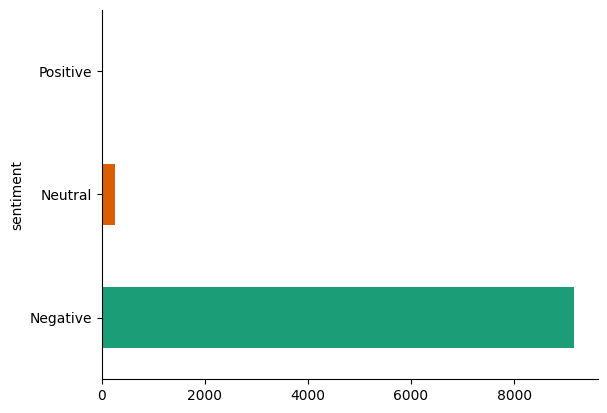

In [106]:
from matplotlib import pyplot as plt
import seaborn as sns
result.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Conclusion

The sentiment analysis results indicate a predominant negative sentiment across the dataset with **9,166 instances classified as negative**. This overwhelming majority suggests that the data, possibly customer reviews or social media comments, contains largely unfavorable opinions or experiences.

**Neutral sentiments are significantly fewer**, totaling only **262 instances**. This might indicate that a small portion of the content is factual or impartial, lacking strong emotional expressions.

**Positive sentiments are the least common**, with merely **25 instances**. This rarity in positive feedback could point to areas requiring improvement or might reflect specific issues prevalent within the dataset's context.

Overall, the dominance of negative sentiment underscores a potential concern that may need addressing if the dataset represents a business or service. These insights can guide further analysis to pinpoint the underlying causes and inform strategies for enhancing satisfaction or perception.